In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from rlxutils import subplots
from itertools import product
from scipy.ndimage import uniform_filter

sys.path.append("..")
from lib import io
from lib import sar
import torch

np.set_printoptions(edgeitems=4, linewidth=180)

from importlib import reload
reload(sar)

<module 'lib.sar' from '/home/alberto/github/sar-recovery/notebooks/../lib/sar.py'>

In [2]:
base_path = "/home/alberto/data/data/RST2/Barcelona"
date = '20100520'


## load scatter matrix from files


In [3]:
sm = io.load_bcn_scatter_matrix(base_path, date)
sm.shape

(4402, 1602, 2, 2)

## get scattering vector $\mathbf{w}_l$


In [4]:
wl = sar.get_scattering_vector_from_S_matrix(sm)
wl.shape

(4402, 1602, 3)

## compute coherence matrix pixel wise with no averaging


In [5]:
cm = sar.get_covariance_matrix_from_w(wl)
cm.shape

(4402, 1602, 3, 3)

## Perform spatial averaging and get coherency matrix

In [6]:
C = uniform_filter(cm, (7,7,1,1))
T = sar.get_T_from_C(C)


## Perform H alpha plane classification (8 classes)

In [7]:
cl_Halpha = sar.H_alpha_plane_classification(T)
cl_Halpha.shape

(4402, 1602)

In [8]:
cl_Halpha


array([[6, 6, 6, 6, ..., 7, 5, 5, 5],
       [6, 6, 6, 6, ..., 7, 5, 7, 5],
       [6, 6, 6, 6, ..., 7, 7, 7, 5],
       [6, 6, 6, 6, ..., 5, 5, 5, 5],
       ...,
       [1, 1, 1, 1, ..., 1, 1, 1, 1],
       [1, 1, 1, 1, ..., 1, 1, 1, 1],
       [1, 1, 1, 1, ..., 1, 1, 1, 1],
       [1, 1, 1, 1, ..., 1, 1, 1, 1]], dtype=int32)

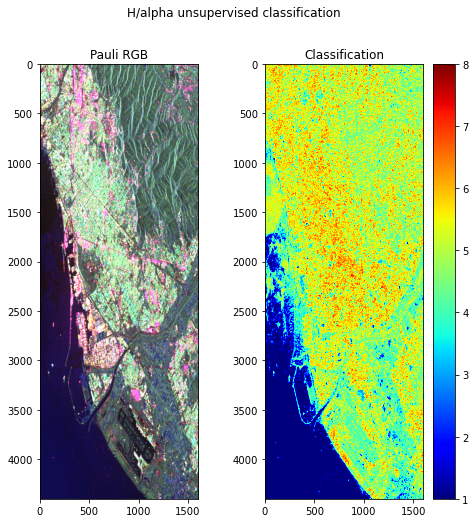

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
fig.suptitle('H/alpha unsupervised classification')
ax1.imshow(sar.generate_Pauli_RGB_from_T(T))
ax1.set_title('Pauli RGB')
im = ax2.imshow(cl_Halpha, cmap='jet')
ax2.set_title('Classification')
fig.colorbar(im, ax=[ax2])


(array([1193503.,   21316.,  168965., 1801610., 2101189., 1010798.,  677632.,   76991.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <BarContainer object of 8 artists>)

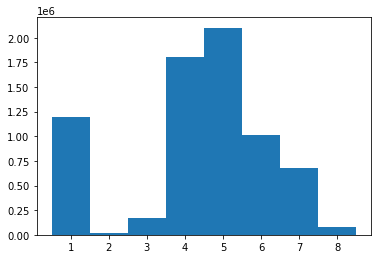

In [10]:
plt.hist(cl_Halpha.ravel(), bins=np.arange(9) + 0.5)

## Perform H A alpha plane classification (16 classes)

In [11]:
cl_HAalpha = sar.H_A_alpha_plane_classification(T)
cl_HAalpha.shape

(4402, 1602)

In [12]:
cl_HAalpha

array([[12, 11, 11, 11, ..., 13,  9,  9,  9],
       [11, 11, 11, 11, ..., 13,  9, 13,  9],
       [11, 11, 11, 11, ..., 13, 13, 13,  9],
       [11, 12, 12, 12, ...,  9,  9,  9,  9],
       ...,
       [ 2,  2,  2,  2, ...,  1,  1,  1,  2],
       [ 1,  2,  2,  2, ...,  1,  1,  1,  2],
       [ 1,  1,  1,  1, ...,  1,  1,  1,  2],
       [ 1,  1,  1,  1, ...,  1,  1,  1,  2]], dtype=int32)

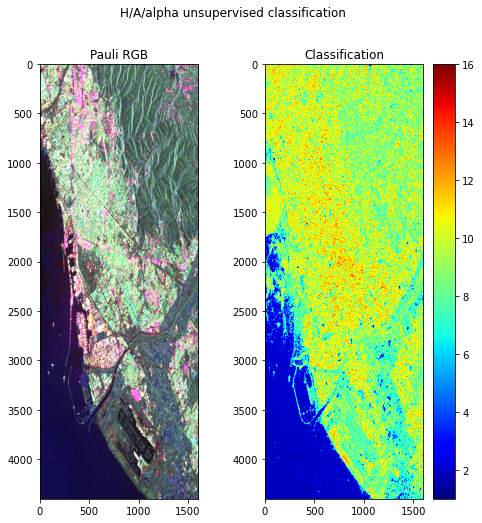

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
fig.suptitle('H/A/alpha unsupervised classification')
ax1.imshow(sar.generate_Pauli_RGB_from_T(T))
ax1.set_title('Pauli RGB')
im = ax2.imshow(cl_HAalpha, cmap='jet')
ax2.set_title('Classification')
fig.colorbar(im, ax=[ax2])


(array([1.501020e+05, 1.043401e+06, 6.807000e+03, 1.450900e+04, 4.413800e+04, 1.248270e+05, 1.365315e+06, 4.362950e+05, 1.542664e+06, 5.585250e+05, 5.751020e+05, 4.356960e+05,
        6.765640e+05, 1.068000e+03, 7.694500e+04, 4.600000e+01]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <BarContainer object of 16 artists>)

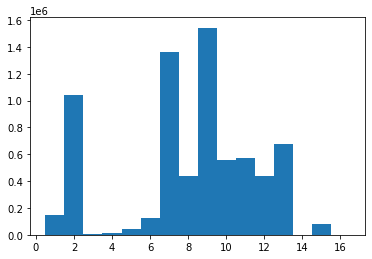

In [14]:
plt.hist(cl_HAalpha.ravel(), bins=np.arange(17) + 0.5)